In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
nltk.download('punkt')
nltk.download('stopwords')

#vectorization
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josieldelgadillo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josieldelgadillo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#get data
df = pd.read_csv("./data/barronsonline_tweets.csv")
df.head()

,Unnamed: 0,tweet_id,tweet_date,tweet_time,tweet_text,likes,retweets,parent_tweet_id,username,tweet_url
0,0,1360044606193295361,2021-02-12,01:54:37,"Hologic has gained 55% during the past year, b...",4,2,NaN,NaN,https://twitter.com/elonmusk/status/1360044606...
1,1,1360007215726403586,2021-02-11,23:26:02,Online travel agency Expedia had a far worse f...,1,1,NaN,NaN,https://twitter.com/elonmusk/status/1360007215...
2,2,1360002123212218369,2021-02-11,23:05:48,Payments company Affirm topped forecasts in it...,3,2,NaN,NaN,https://twitter.com/elonmusk/status/1360002123...
3,3,1359991942793289729,2021-02-11,22:25:21,CEO Zander Lurie says he thinks the company ha...,4,1,NaN,NaN,https://twitter.com/elonmusk/status/1359991942...
4,4,1359986836693737474,2021-02-11,22:05:03,"The Dow ended slightly in the red, but not bef...",2,1,NaN,NaN,https://twitter.com/elonmusk/status/1359986836...


In [3]:
# clean data from punctuation, alphabets, and english stop words
clean = []

for index, row in df.iterrows():
    tokens = nltk.word_tokenize(row.tweet_text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    reconstruct = TreebankWordDetokenizer().detokenize(tokens)
    new = reconstruct.translate(str.maketrans('', '', string.punctuation))
    stripped = nltk.word_tokenize(new)
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    reconstruct = TreebankWordDetokenizer().detokenize(words)
    reconstruct = reconstruct.replace("https", "")
    clean_tokens = nltk.word_tokenize(reconstruct)
    # assigning clean list to new attribute
    clean.append(clean_tokens)
df['Clean'] = clean
df.head()

,Unnamed: 0,tweet_id,tweet_date,tweet_time,tweet_text,likes,retweets,parent_tweet_id,username,tweet_url,Clean
0,0,1360044606193295361,2021-02-12,01:54:37,"Hologic has gained 55% during the past year, b...",4,2,NaN,NaN,https://twitter.com/elonmusk/status/1360044606...,"[hologic, gained, past, year, valuation, dropp..."
1,1,1360007215726403586,2021-02-11,23:26:02,Online travel agency Expedia had a far worse f...,1,1,NaN,NaN,https://twitter.com/elonmusk/status/1360007215...,"[online, travel, agency, expedia, far, worse, ..."
2,2,1360002123212218369,2021-02-11,23:05:48,Payments company Affirm topped forecasts in it...,3,2,NaN,NaN,https://twitter.com/elonmusk/status/1360002123...,"[payments, company, affirm, topped, forecasts,..."
3,3,1359991942793289729,2021-02-11,22:25:21,CEO Zander Lurie says he thinks the company ha...,4,1,NaN,NaN,https://twitter.com/elonmusk/status/1359991942...,"[ceo, zander, lurie, says, thinks, company, co..."
4,4,1359986836693737474,2021-02-11,22:05:03,"The Dow ended slightly in the red, but not bef...",2,1,NaN,NaN,https://twitter.com/elonmusk/status/1359986836...,"[dow, ended, slightly, red, setting, intraday,..."


In [4]:
#Word2Vec implemntation
w2v = Word2Vec(df['Clean'],
                min_count=10,
                workers=4,
                size=50,
                window=5,
                iter=10).wv

#vocab size
print(len(w2v.vocab.keys()))
print (list(w2v.vocab))

861
['gained', 'past', 'year', 'valuation', 'dropped', 'worth', 'look', 'online', 'travel', 'far', 'fourth', 'quarter', 'analysts', 'payments', 'company', 'forecasts', 'first', 'quarterly', 'report', 'public', 'guidance', 'may', 'ceo', 'says', 'thinks', 'set', 'changes', 'growth', 'dow', 'ended', 'red', 'high', 'initial', 'jobless', 'claims', 'could', 'much', 'billion', 'range', 'central', 'banks', 'maker', 'announced', 'deal', 'berkshire', 'hathaway', 'sell', 'electric', 'yield', 'levels', 'health', 'began', 'trading', 'thursday', 'jumped', 'forecast', 'number', 'learn', 'pandemic', 'auto', 'industry', 'us', 'two', 'well', 'new', 'york', 'show', 'might', 'home', 'executives', 'although', 'john', 'took', 'continued', 'amid', 'record', 'quickly', 'developed', 'early', 'january', 'event', 'international', 'due', 'made', 'surge', 'interest', 'among', 'news', 'tesla', 'price', 'citi', 'sees', 'coming', 'several', 'raised', 'targets', 'group', 'stock', 'week', 'response', 'sales', 'expected

In [5]:
data = w2v.vectors
model = DBSCAN(eps = 0.66, min_samples=19).fit(data)

In [6]:
# get outlier data
outliers_df = pd.DataFrame(data)
print(Counter(model.labels_))
print(outliers_df.shape)
#print(outliers_df[model.labels_==-1])

Counter({0: 855, -1: 6})
(861, 50)


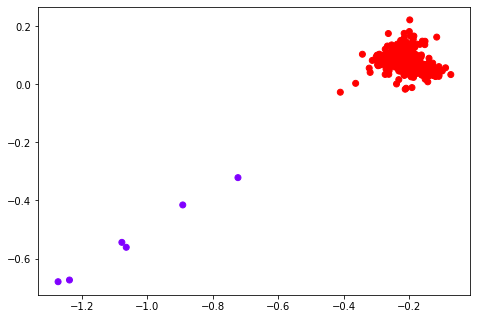

In [7]:
#visualize DBSCAN results
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
colors = model.labels_
ax.scatter(data[:,0], data[:,1] , c=colors, cmap='rainbow')